# Notebook for initial analysis of the Tidal Data

## From this code we can start generating useful functions

In [158]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import os

In [27]:
datadir = "../Data"

## Load the tidal csv data and put into a single dataframe and create a useful datetime index

In [2]:
def load_Neah_Bay(datadir):
    """
    Function to load the Neah Bay tidal station data from 2015 - 2016 
    and returns a dataframe and a Datetime Index object
    Datadir is the directory path to where the data is located
    """
    if not os.path.exists(datadir + '/*NeahBay.csv'):
        return None
    else:
        NeahBay_2014 = pd.read_csv(datadir + "/2014_NeahBay.csv",parse_dates=['Date Time'])
        NeahBay_2015 = pd.read_csv(datadir + "/2015_NeahBay.csv",parse_dates=['Date Time'])
        NeahBay_2016 = pd.read_csv(datadir + "/2016_NeahBay.csv",parse_dates=['Date Time'])
        NeahBay = NeahBay_2014.append(NeahBay_2015)
        NeahBay = NeahBay.append(NeahBay_2016)
        return NeahBay

In [3]:
def load_Port_Angeles(datadir):
    """
    Function to load the Port Angeles tidal station data from 2015 & 2016 
    Supply the directory to where the csv files with the data are saved
    Returns None if files are not located in specified directory
    """
    if not os.path.exists(datadir + '/*PortAngeles.csv'):
        return None
    else:
        # Load the Port Angeles tidal data and put into one dataframe
        PortAngeles_2014 = pd.read_csv(datadir + '/2014_PortAngeles.csv',parse_dates=['Date Time'])
        PortAngeles_2015 = pd.read_csv(datadir + '/2015_PortAngeles.csv',parse_dates=['Date Time'])
        PortAngeles_2016 = pd.read_csv(datadir + '/2016_PortAngeles.csv',parse_dates=['Date Time'])
        PortAngeles = PortAngeles_2014.append(PortAngeles_2015)
        PortAngeles = PortAngeles.append(PortAngeles_2016)
        return PortAngeles

In [170]:
def load_Port_Townsend(datadir):
    """
    Function to load the Port Townsend tidal station data from 2015 & 2016 
    Supply the directory to where the csv files with the data are saved
    Returns None if files are not located in specified directory
    """
    if not os.path.exists(datadir + '/*PortTownsend.csv'):
        return None
    else:
        PortTownsend_2015 = pd.read_csv(datadir + '/2015_PortTownsend.csv',parse_dates=['Date Time'])
        PortTownsend_2016 = pd.read_csv(datadir + '/2016_PortTownsend.csv',parse_dates=['Date Time'])
        PortTownsend = PortTownsend_2014.append(PortTownsend_2015)
        PortTownsend = PortTownsend.append(PortTownsend_2016)
        return PortTownsend

In [5]:
def load_tide_data(datadir):
    """
    Upper level load function for the Tide Data.
    Datadir is the directory where the data .csv files are saved
    """
    NeahBay = load_Neah_Bay(datadir)
    PortAngeles = load_Port_Angeles(datadir)
    PortTownsend = load_Port_Townsend(datadir)
    if NeahBay==None:
        return None
    elif PortAngeles==None:
        return None
    elif PortTownsend==None:
        return None
    else:
        return NeahBay, PortAngeles, PortTownsend
    

In [ ]:
def select_tide_data(df,df_datetime,date1,date2):
    """
    Function to select data that falls within a date range.
    Inputs:
        df: dataframe
        df_datetime: dataframe's datetime index
        date1: A datestring with the min index
        date2: A datestring with the max index
    Outputs:
        df: new dataframe with only the data between date1 and date2
        df_datetime: Datetime Index for the new dataframe
    """
    # Convert the dates into datetime objects
    dt1 = pd.DatetimeIndex(date1)[0]
    dt2 = pd.DatetimeIndex(date2)[0]
    # Select the dataframe that falls within the time range
    df = df[df_datetime >= dt1]
    # Repeat for the dataframe's datetime index
    df_datetime = df_datetime[df_datetime >= dt1]
    df = df[df_datetime <= dt2]
    df_datetime = df_datetime[df_datetime <= dt2]
    return df, df_datetime
    

In [171]:
stuff = load_Port_Townsend("../..")

In [173]:
print(stuff)

None


In [6]:
NeahBay, PortAngeles, PortTownsend = load_tide_data("../Data")

In [10]:
def create_tide_dataset(NeahBay,PortAngeles,PortTownsend):
    """
    Function takes in the tidal station dataframes and returns
    an Xarray Dataset with the tidal station data
    """
    NB = xr.DataArray(NeahBay[' Water Level'],dims='datetime')
    PA = xr.DataArray(PortAngeles[' Water Level'],dims='datetime')
    PT = xr.DataArray(PortTownsend[' Water Level'],dims='datetime')
    Tides = xr.Dataset({'NeahBay':NB, 'PortAngeles':PA, 'PortTownsend':PT})
    return Tides

In [204]:
# Doesn't work!
def select_tide_data(ds,vari,coord,val1,val2):
    """
    Function that selects data between two times for the
    specified variable (var) and returns a Xarray DataArray
    with the selected times. 
    Inputs are:
        ds - Xarray Dataset
        var - variable to operate on in the Dataset
        coord - coordinate name to select on
        val1 - starting value to select between
        val2 - ending value to select between
    Returns:
        da - Xarray DataArray
    """
    da = ds.vari.sel(coord=slice(val1,val2))
    return da

In [ ]:
NB = Tides.NeahBay.sel(datetime=slice('2015-01-01','2015-01-02'))
PA = Tides.PortAngeles.sel(datetime=slice('2015-01-01','2015-01-02'))
PT = Tides.PortTownsend.sel(datetime=slice('2015-01-01','2015-01-02'))

In [185]:
Tides.NeahBay

<xarray.DataArray 'NeahBay' (datetime: 164846)>
array([-0.348, -0.354, -0.328, ...,    nan,    nan,    nan])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-01-01 2015-01-01T00:06:00 ...

In [104]:
from ipywidgets import interact
import ipywidgets as widgets

In [116]:
def plot_tide_data(dt):
    """
    This function plots the three tidal stations for the given
    time period along with a marker showing the time and elevation
    selected using the widget slider
    """
    fig, axes = plt.subplots(nrows=3)
    NB.plot(ax=axes[0])
    axes[0].scatter(x=NB.datetime.values[dt],y=NB.values[dt],color="red",s=100)
    axes[0].grid()

    PA.plot(ax=axes[1])
    axes[1].scatter(x=NB.datetime.values[dt],y=PA.values[dt],color="red",s=100)
    axes[1].grid()

    PT.plot(ax=axes[2])
    axes[2].scatter(x=NB.datetime.values[dt],y=PT.values[dt],color="red",s=100)
    axes[2].grid()

In [192]:
slide = widgets.IntSlider(1,1,len(NB.datetime.values)-1)

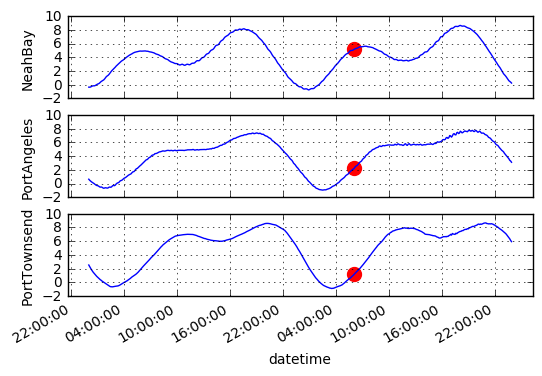

In [193]:
interact(plot_tide_data,dt=slide)

In [196]:
slide.value

301

In [198]:
def plot_tidal_elevation(slide):
    try:
        # Create a figure with 3 rows & 1 column
        fig, axes = plt.subplots(nrows=1,ncols=1)
        # Get each station's tidal elevation based on the widget slider
        NBelev = NB.values[slide.value]
        PAelev = PA.values[slide.value]
        PTelev = PT.values[slide.value]
        # Create dummy x-values
        x=(1,2,3)
        y=(NBelev,PAelev,PTelev)
        # Create the figure with station labels
        plt.scatter(x,y,s=100,color="red",zorder=2)
        plt.plot(x,y,'b',zorder=1)
        plt.xticks(x,['Neah Bay','Port Angeles','Port Townsend'],rotation='vertical')
        plt.grid()
        plt.ylabel('Tidal Elevation (m)')
    except:
        return None

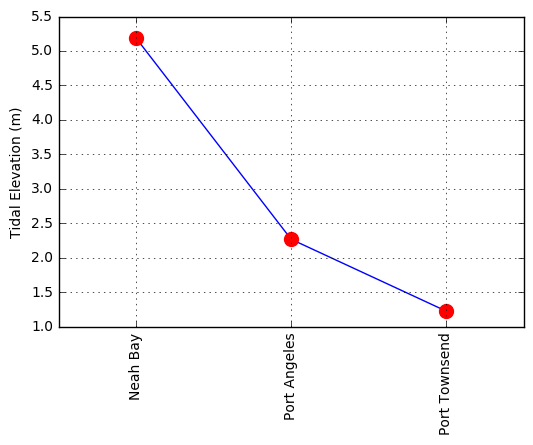

In [199]:
plot_tidal_elevation(slide)

[1, 2, 3]

### Just do some plotting to make sure the data looks reasonable

In [ ]:
%matplotlib inline

In [ ]:
# Try taking the difference in the water level between the different stations
dif_Neah_Angeles = NeahBay[' Water Level'] - PortAngeles[' Water Level']

In [ ]:
NB, NB_dt = select_tide_data(NeahBay,NeahBay_datetime,['Jan 1 2016'],['Jan 31 2016 23:59:59'])
PA, PA_dt = select_tide_data(PortAngeles,PortAngeles_datetime,['Jan 1 2016'],['Jan 31 2016 23:59:59'])
PT, PT_dt = select_tide_data(PortTownsend,PortTownsend_datetime,['Jan 1 2016'],['Jan 31 2016 23:59:59'])

In [ ]:
dif_NB_PA['Water Level'] = NB[' Water Level'] - PA[' Water Level']

In [ ]:
dif_NB_PA['Date Time'] = NB['Date Time']

In [ ]:
NB[' Water Level'].groupby(NB_dt.date).mean().plot().grid()

In [ ]:
# Plot the daily mean of the tides data from Neah Bay stations
NeahBay[' Water Level'].groupby(NeahBay_datetime.date).mean().plot().grid()

In [ ]:
# Plot the daily mean of the tides data from Port Angeles stations
PortAngeles[' Water Level'].groupby(PortAngeles_datetime.date).mean().plot().grid()

In [ ]:
# Plot the daily mean of the tides data from Port Townsend stations
PortTownsend[' Water Level'].groupby(PortTownsend_datetime.date).mean().plot().grid()